In [1]:
import pandas as pd
adult_data = pd.read_csv("Data/adult.data",header=None,names=["age","workclass","fnlwgt","education","education_num","marital-status",
                                                  "occupation","relationship","race","sex","capital-gain","capital-loss",
                                                  "hours-per-week","native-country","money"
                                                  ])
adult_data

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,money
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
adult_data["hours-per-week"].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [3]:
adult_data["hours-per-week"].var()

152.45899505045418

In [4]:
adult_data["hours-per-week"].median()

40.0

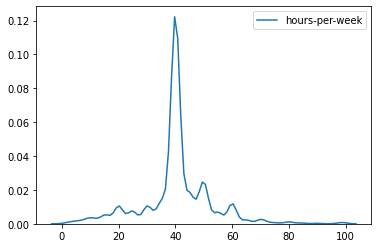

In [5]:
import seaborn as sns
sns.kdeplot(adult_data["hours-per-week"])

In [6]:
adult_data["occupation"].unique()
adult_data["money"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [7]:
# 如果大于40则代表工作时间长
# adult_data["longtime_work"] =  adult_data["hours-per-week"] > 40

# # 如果收入>50K代表收入高
# adult_data["money"] = adult_data["money"] == ' >50K'
# adult_data

In [135]:
from sklearn.feature_selection import VarianceThreshold
X = adult_data[["education_num"]]
Y = adult_data["money"]

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dtc = DecisionTreeClassifier(random_state=14)
score = cross_val_score(dtc, X, Y, scoring='accuracy')
score.mean()

0.7795829669332663

In [12]:
X = adult_data[["age","education_num","capital-gain","capital-loss","hours-per-week"]].values
Y = adult_data["money"]
vt = VarianceThreshold(threshold=200)
Xt = vt.fit_transform(X)
vt.variances_

array([1.86055686e+02, 6.61868663e+00, 5.45408641e+07, 1.62371951e+05,
       1.52454313e+02])

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dtc = DecisionTreeClassifier(random_state=14)
score = cross_val_score(dtc, Xt, Y, scoring='accuracy')
score.mean()

0.8311784058041543

In [122]:
X = adult_data[["age","education_num","capital-gain","capital-loss","hours-per-week"]].values
Y = adult_data["money"].values

from sklearn.feature_selection import SelectKBest
# 导入卡方验证
from sklearn.feature_selection import chi2


# 选取前3个最好的节点
transformer = SelectKBest(score_func=chi2,k=3)
X_chi2 = transformer.fit_transform(X,Y)
transformer.scores_

array([8.60061182e+03, 2.40142178e+03, 8.21924671e+07, 1.37214589e+06,
       6.47640900e+03])

In [124]:
transformer.pvalues_

array([0., 0., 0., 0., 0.])

In [120]:
transformer.get_support()

array([ True,  True, False, False,  True])

In [99]:
X_chi2

array([[   39,  2174,     0],
       [   50,     0,     0],
       [   38,     0,     0],
       ...,
       [   58,     0,     0],
       [   22,     0,     0],
       [   52, 15024,     0]])

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dtc = DecisionTreeClassifier(random_state=14)
score = cross_val_score(dtc, X_chi2, Y, scoring='accuracy')
score.mean()

0.8291514400795839

In [117]:
from scipy.stats import pearsonr
def pearsonr_fit(x,y):
    scores=[]
    p_values = []
    for column in range(X.shape[1]):
        # cur_p表示的双侧p值
        cur_score,cur_p = pearsonr(x[:,column],y)
        scores.append(abs(cur_score))
        p_values.append(cur_p)
    return (np.array(scores),np.array(p_values))

In [118]:
import numpy as np
X = adult_data[["age","education_num","capital-gain","capital-loss","hours-per-week"]].values
Y = adult_data["money"] == " >50K"
transformer = SelectKBest(score_func=pearsonr_fit,k=3)
X_pearsonr = transformer.fit_transform(X,Y)
transformer.scores_

array([0.2340371 , 0.33515395, 0.22332882, 0.15052631, 0.22968907])

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dtc = DecisionTreeClassifier(random_state=14)
score = cross_val_score(dtc, X_pearsonr, Y, scoring='accuracy')
score.mean()

0.7721507467016449